# LDA Topic Modeling and Cluster Analysis 

In [9]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from spacy import displacy
import pyLDAvis.sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Stats and Shape

In [10]:
news_data = pd.read_csv('/Users/briankalinowski/Desktop/Data/news_ner_noun_content.csv')
print('Data Shape:', news_data.shape, '\n')
print('Article Classes:')
print(news_data.type.value_counts())
news_data.head()

Data Shape: (26227, 6) 

Article Classes:
bs                     10352
Atlantic                1000
CNN                     1000
New York Post           1000
Vox                     1000
Reuters                 1000
Buzzfeed News           1000
National Review         1000
NPR                     1000
Breitbart               1000
New York Times           999
Guardian                 999
Washington Post          998
Business Insider         997
Fox News                 907
Talking Points Memo      577
conspiracy               422
bias                     400
hate                     242
state                    119
junksci                  100
satire                    96
fake                      19
Name: type, dtype: int64


,title,text,type,tokenized_headline,tokenized_content,valid_score
0,Muslims BUSTED They Stole Millions In Govt Ben...,Print They should pay all the back all the mon...,bias,muslims,somalis,0
1,Re Why Did Attorney General Loretta Lynch Plea...,Why Did Attorney General Loretta Lynch Plead T...,bias,loretta lynch,loretta lynch barracuda brigade iran loretta l...,0
2,BREAKING Weiner Cooperating With FBI On Hillar...,Red State Fox News Sunday reported this mornin...,bias,weiner fbi hillary email investigation,red state fox news anthony weiner fbi hillary ...,0
3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,bias,donald j. trump,kayla mueller isis carl mueller donald trump,0
4,FANTASTIC! TRUMPS 7 POINT PLAN To Reform Healt...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias,notokes,house senate obamacare obamacare democrats oba...,0


## Spacy Processing and Feature Selection

In [11]:
# All headlines for fake articles
fake_headlines = [str(hl) for hl in list(news_data[news_data.type == 'fake']['title'])]

# Spacy English model
nlp = spacy.load('en_core_web_lg')

# Spacy procssing pipeline
spacy_pipline = nlp.pipe(fake_headlines)

# viz options
options = {"compact": True, "bg": "#09a3d5", "color": "white"}

for doc in spacy_pipline:
    displacy.render(doc, style="ent", jupyter=True, options=options) 
    displacy.render(doc, style="dep", jupyter=True, options=options) 

## LDA Topic Modeling

In [13]:
# Doc term matrix with ner/noun tokens
vectorizer = CountVectorizer(min_df=10, stop_words=['notokes'])
content_vectorized = vectorizer.fit_transform(news_data.tokenized_content)
print('CountVectorizer Shape:', content_vectorized.shape, '\n')

# LDA transformation
lda = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online', verbose=True, random_state=2)
news_topics = lda.fit_transform(content_vectorized)

CountVectorizer Shape: (26227, 9412) 

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [17]:
pyLDAvis.enable_notebook()
lda_doc_word_clusters = pyLDAvis.sklearn.prepare(lda, content_vectorized, vectorizer, sort_topics=True, mds='tsne')
lda_doc_word_clusters

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      295.389008   61.451225       1        1  22.671618
6      139.347183  243.099579       2        1  15.384165
9       80.993591    5.055250       3        1  10.888562
3     -278.231323  133.368851       4        1   9.395525
2     -324.818878 -101.525978       5        1   8.878854
1      -71.214516  194.979523       6        1   7.513690
7       41.829136 -235.207794       7        1   6.795639
8     -168.788696 -283.201294       8        1   6.681805
4     -110.394829  -45.237156       9        1   5.923363
5      248.832489 -173.459549      10        1   5.866780, topic_info=     Category          Freq      Term         Total  loglift  logprob
8667  Default  55745.000000     trump  55745.000000  30.0000  30.0000
1707  Default  33658.000000   clinton  33658.000000  29.0000  29.0000
3848  Default  17820.000000   hillary  17820.000000  28.0000  28.0000
7429  Default  10784.000000    russia  10784.000000  27.0000  27.0000
2921  Default   8243.000000       fbi   8243.000000  26.0000  26.0000
...       ...           ...       ...           ...      ...      ...
4434  Topic10    684.651665      john   6060.855178   0.6552  -4.8290
3050  Topic10    479.400961   florida   3041.263420   0.9884  -5.1853
327   Topic10    497.348782  american   3757.932953   0.8135  -5.1486
326   Topic10    520.510713   america   8077.499583   0.0938  -5.1031
5965  Topic10    416.162234  national   5564.652783   0.2427  -5.3268

[605 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
28        2  0.047215      abe
28       10  0.953156      abe
29        5  0.029565   abedin
29        6  0.969517   abedin
46        1  0.997875      aca
...     ...       ...      ...
9352      2  0.224935  youtube
9352      6  0.048597  youtube
9352      7  0.048597  youtube
9352      9  0.627596  youtube
9389      2  0.999477     zika

[1142 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 10, 4, 3, 2, 8, 9, 5, 6])

In [15]:
topic_type_summary = pd.DataFrame(news_data.type)
topic_type_summary['topic_id'] = pd.Series([news_topics[n].argmax() for n in range(news_topics.shape[0])])
topic_type_summary['valid_score'] = news_data.valid_score
topic_type_summary = topic_type_summary.groupby(['valid_score', 'type', 'topic_id']).size()
topic_type_summary = topic_type_summary.unstack('topic_id')
topic_type_summary = topic_type_summary.fillna(0.0)
topic_type_summary

topic_id                              0      1       2       3      4      5  \
valid_score type                                                               
0           bias                  191.0   35.0    60.0    11.0   19.0   16.0   
            bs                   1898.0  851.0  1194.0  1272.0  632.0  512.0   
            conspiracy             80.0   27.0    75.0    36.0   14.0   41.0   
            fake                    7.0    1.0     2.0     0.0    3.0    1.0   
            hate                   62.0   27.0    24.0    19.0   22.0   16.0   
            junksci                 6.0    2.0     4.0     4.0    5.0    3.0   
            satire                 22.0    4.0     4.0     3.0    8.0   13.0   
            state                   5.0    0.0     4.0    19.0   11.0    7.0   
1           Atlantic              300.0   30.0    21.0    46.0   37.0   36.0   
            Breitbart             338.0   48.0    52.0    48.0   44.0   36.0   
            Business Insider      232.0   63.0    28.0    45.0   76.0   50.0   
            Buzzfeed News         277.0   41.0    26.0    35.0   42.0   44.0   
            CNN                   242.0   46.0    25.0    49.0   83.0   57.0   
            Fox News              391.0   90.0    86.0    26.0   26.0   46.0   
            Guardian              223.0   22.0    12.0    44.0   64.0   41.0   
            NPR                   155.0   27.0    30.0    36.0   68.0   50.0   
            National Review       428.0   30.0    45.0    56.0   38.0   22.0   
            New York Post         121.0   29.0    21.0    16.0   33.0   43.0   
            New York Times        214.0   22.0    17.0    62.0   61.0   31.0   
            Reuters               181.0   22.0    13.0    70.0   77.0   19.0   
            Talking Points Memo   321.0   49.0    14.0    27.0    8.0    8.0   
            Vox                   394.0   20.0    52.0    25.0   40.0   20.0   
            Washington Post       382.0   56.0    29.0    59.0   23.0   35.0   

topic_id                              6      7      8       9  
valid_score type                                               
0           bias                   44.0    5.0    5.0    14.0  
            bs                   1231.0  799.0  763.0  1200.0  
            conspiracy             26.0   54.0   34.0    35.0  
            fake                    5.0    0.0    0.0     0.0  
            hate                   33.0    9.0   16.0    14.0  
            junksci                17.0    4.0    7.0    48.0  
            satire                 22.0    0.0    9.0    11.0  
            state                   6.0   46.0   14.0     7.0  
1           Atlantic              321.0   30.0   66.0   113.0  
            Breitbart             208.0   79.0   90.0    57.0  
            Business Insider      291.0   47.0   62.0   103.0  
            Buzzfeed News         282.0   51.0   68.0   134.0  
            CNN                   249.0   94.0   96.0    59.0  
            Fox News               98.0   76.0   33.0    35.0  
            Guardian              291.0   59.0  164.0    79.0  
            NPR                   319.0   56.0   46.0   213.0  
            National Review       179.0   35.0   50.0   117.0  
            New York Post         551.0   38.0   57.0    91.0  
            New York Times        363.0   50.0   73.0   106.0  
            Reuters               157.0  100.0  136.0   225.0  
            Talking Points Memo    62.0   26.0   19.0    43.0  
            Vox                   224.0   21.0   63.0   141.0  
            Washington Post       211.0   26.0   52.0   125.0

In [31]:
topic_valid_summary = pd.DataFrame(news_data.valid_score)
topic_valid_summary['topic_id'] = pd.Series([news_topics[n].argmax() for n in range(news_topics.shape[0])])
topic_valid_summary = topic_valid_summary.groupby(['valid_score', 'topic_id']).size()
topic_valid_summary = topic_valid_summary.unstack('topic_id')
topic_valid_summary = topic_valid_summary.fillna(0.0)
topic_valid_summary

topic_id,0,1,2,3,4,5,6,7,8,9
valid_score,,,,,,,,,,
0,2271,947,1367,1364,714,609,1384,917,848,1329
1,4199,595,471,644,720,538,3806,788,1075,1641


In [33]:
tsne = TSNE(n_components=2, init='pca', random_state=2)

content_clusters_lda = pd.DataFrame(tsne.fit_transform(news_topics), columns=['X', 'Y'])
content_clusters_lda['topic_id'] = pd.Series([news_topics[n].argmax() for n in range(news_topics.shape[0])])
content_clusters_lda['valid_score'] = news_data.valid_score
content_clusters_lda.head()

,X,Y,topic_id,valid_score
0,2.895022,-47.322048,3,0
1,21.400068,-66.983475,1,0
2,39.220543,-61.087105,1,0
3,16.239603,53.988625,6,0
4,70.773811,42.371193,0,0


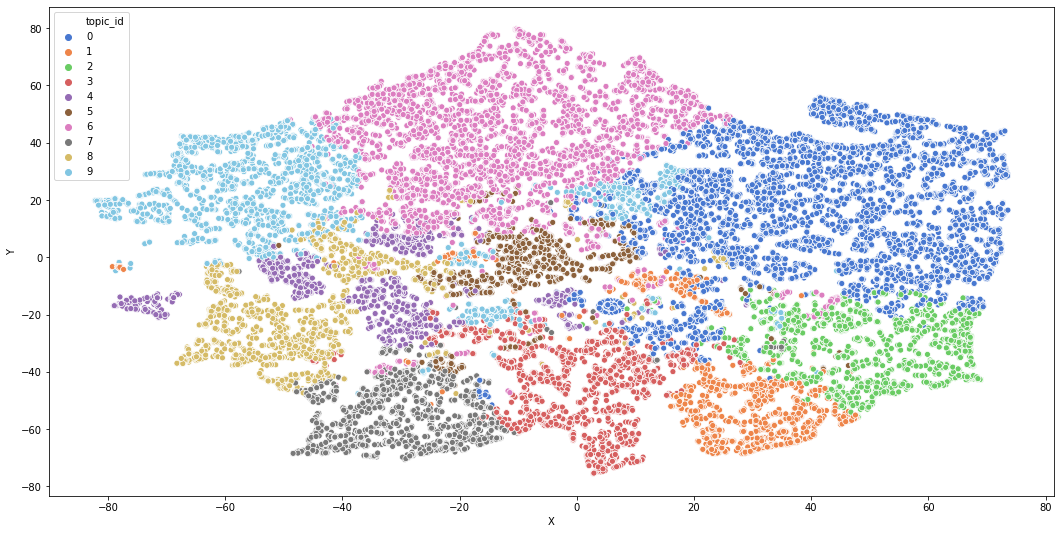

In [35]:
plt.figure(figsize=(18,9))
sns.scatterplot(x=content_clusters_lda.X, 
                y=content_clusters_lda.Y, 
                hue=content_clusters_lda.topic_id, 
                palette=sns.color_palette('muted', 10))

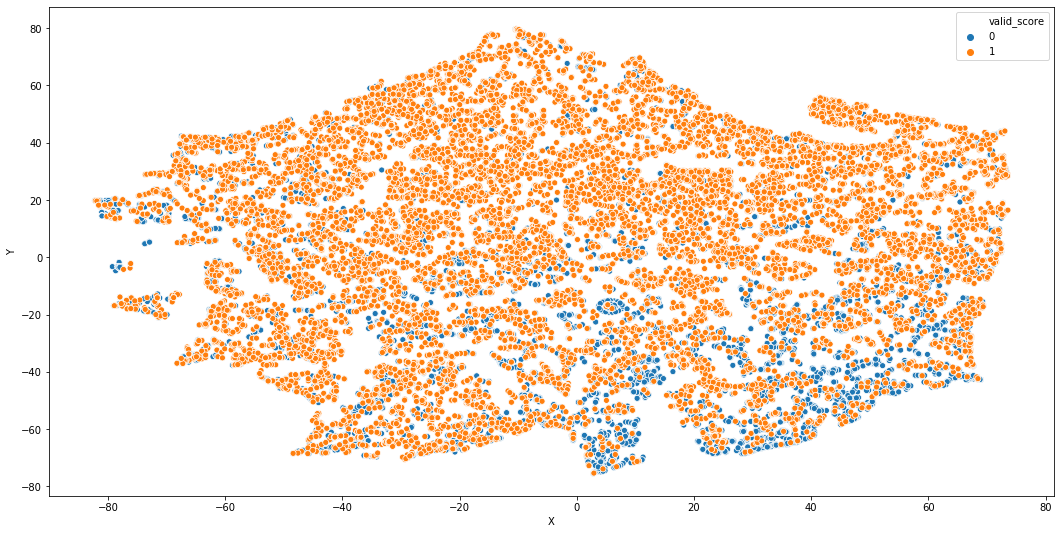

In [34]:
plt.figure(figsize=(18,9))
sns.scatterplot(x=content_clusters_lda.X, 
                y=content_clusters_lda.Y, 
                hue=content_clusters_lda.valid_score)

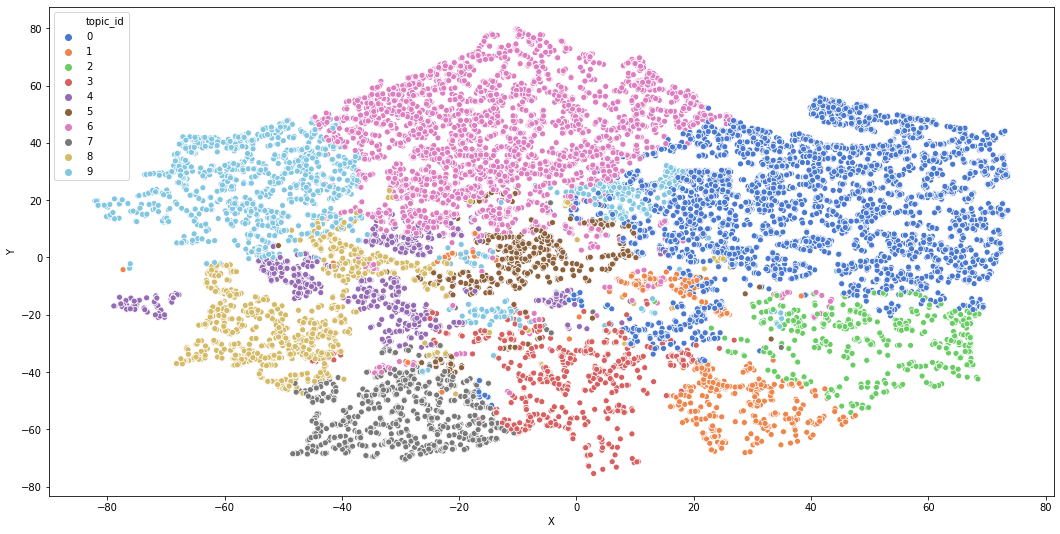

In [39]:
real_news_content_cluters = content_clusters_lda[content_clusters_lda.valid_score == 1]

plt.figure(figsize=(18,9))
sns.scatterplot(x=real_news_content_cluters.X, 
                y=real_news_content_cluters.Y, 
                hue=real_news_content_cluters.topic_id, 
                palette=sns.color_palette('muted', 10))

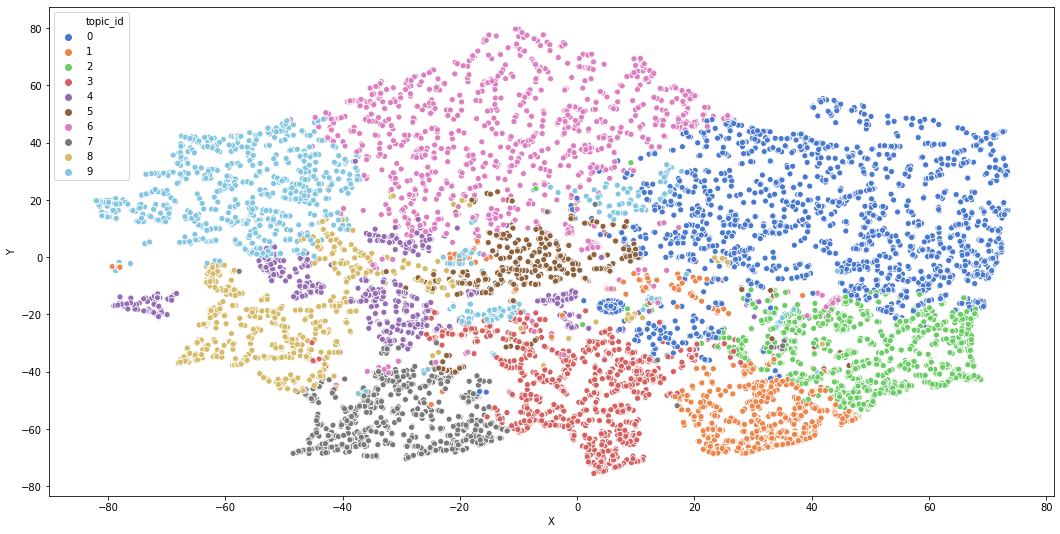

In [40]:
fake_news_content_cluters = content_clusters_lda[content_clusters_lda.valid_score == 0]

plt.figure(figsize=(18,9))
sns.scatterplot(x=fake_news_content_cluters.X, 
                y=fake_news_content_cluters.Y, 
                hue=fake_news_content_cluters.topic_id, 
                palette=sns.color_palette('muted', 10))